# 輪講の例
####  ラプラスメカニズムの説明
####  ラプラスメカニズムのプライバシと有用性の説明
####  合成定理の説明
####  異なるエプシロンの説明
####  プライバシ開示の例

In [25]:
#データの準備
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import laplace
import random

# 2つ出力の統計結果にノイズを加える

In [141]:
n = 20

epsilon = 0.2
seed = 123
sensitivity = n
scale = sensitivity / epsilon
prng = np.random.RandomState(seed)

noises = []
protected_answers = []

noise = prng.laplace(loc=0, scale=scale, size=2)
print(noise)
protected_answer = true_answer + noise
print(protected_answer)

[ 49.91249629 -55.81292211]
[ 56.91249629 -50.81292211]


In [142]:
# ノイズを四捨五入
noise = np.round(noise)
noise

array([ 50., -56.])

# 2つ出力の統計結果にノイズを加える関数を書く

In [143]:
n = 20

def add_noise(true_answer,epsilon,seed):
    epsilon = epsilon
    seed = seed
    sensitivity = n
    scale = sensitivity / epsilon
    prng = np.random.RandomState(seed)
    
    noises = []
    protected_answers = []
    for i in range(1000):
        noise = prng.laplace(loc=0, scale=scale, size=2)
        
        noise = np.round(noise)    #四捨五入
        protected_answer = true_answer + noise
        protected_answers.append(protected_answer)
        noises.append(noise)

    print("ノイズ1の平均：",noises[0].mean())
    print("ノイズ2の平均：",noises[1].mean())
    print("ノイズ1を加えた結果の平均：",protected_answers[0].mean())
    print("ノイズ2を加えた結果の平均：",protected_answers[1].mean())
    print("ラプラスメカニズムの尺度：",scale)
    print("ラプラスメカニズムの敏感度：",sensitivity)

    return protected_answers,noises

# 統計結果[10,10]に対して
## epsilon=0.1とする、1000回実行した結果

In [144]:
# epsilon=0.1とする、1000回実行した結果

true_answer = [10,10] 
protected_answers1,noises1 = add_noise(true_answer, 0.1, 123)

ノイズ1の平均： -6.0
ノイズ2の平均： -68.0
ノイズ1を加えた結果の平均： 4.0
ノイズ2を加えた結果の平均： -58.0
ラプラスメカニズムの尺度： 200.0
ラプラスメカニズムの敏感度： 20


# 千回実行した結果をデータフレームで見る

In [214]:
result = list(zip(protected_answers1, noises1))
df = pd.DataFrame(result, columns=['protected_answers1', 'noises1'])
df

,protected_answers1,noises1
0,"[110.0, -102.0]","[100.0, -112.0]"
1,"[-148.0, 32.0]","[-158.0, 22.0]"
2,"[126.0, -23.0]","[116.0, -33.0]"
3,"[662.0, 102.0]","[652.0, 92.0]"
4,"[2.0, -39.0]","[-8.0, -49.0]"
...,...,...
995,"[123.0, 186.0]","[113.0, 176.0]"
996,"[221.0, 165.0]","[211.0, 155.0]"
997,"[106.0, -180.0]","[96.0, -190.0]"
998,"[134.0, -110.0]","[124.0, -120.0]"


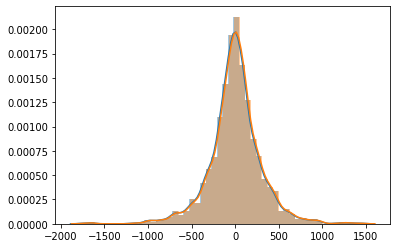

In [198]:
# データの分布の描画
sns.distplot(noises1)
sns.distplot(protected_answers1)

Text(0, 0.5, 'noise')

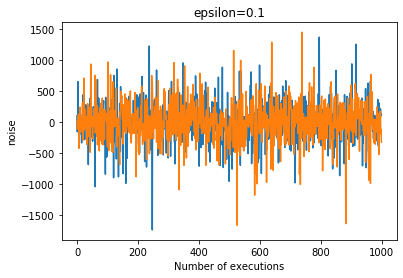

In [199]:
plt.plot(noises1)
plt.title('epsilon=0.1')
plt.xlabel('Number of executions')
plt.ylabel('noise')

# epsilon=10とする、1000回実行した結果

ノイズ1の平均： 2.0
ノイズ2の平均： 0.5
ノイズ1を加えた結果の平均： 12.0
ノイズ2を加えた結果の平均： 10.5
ラプラスメカニズムの尺度： 2.0
ラプラスメカニズムの敏感度： 20


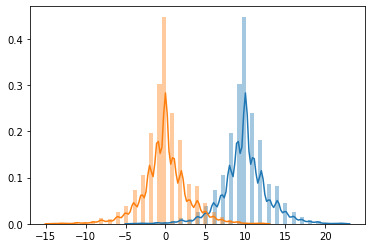

In [205]:
true_answer = [10,10]
protected_answers110,noises110 = add_noise(true_answer, 10, 23)

# データの分布の描画
sns.distplot(protected_answers110)
sns.distplot(noises110)

Text(0, 0.5, 'noise')

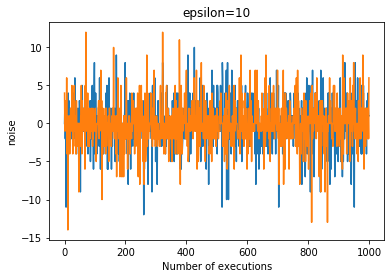

In [208]:
plt.plot(noises110)
plt.title('epsilon=10')
plt.xlabel('Number of executions')
plt.ylabel('noise')

In [207]:
result = list(zip(protected_answers110, noises110))
df = pd.DataFrame(result, columns=['protected_answers(10)', 'noises(10)'])
df

,protected_answers(10),noises(10)
0,"[10.0, 14.0]","[0.0, 4.0]"
1,"[12.0, 9.0]","[2.0, -1.0]"
2,"[8.0, 11.0]","[-2.0, 1.0]"
3,"[8.0, 10.0]","[-2.0, -0.0]"
4,"[11.0, 10.0]","[1.0, -0.0]"
...,...,...
995,"[10.0, 12.0]","[0.0, 2.0]"
996,"[14.0, 8.0]","[4.0, -2.0]"
997,"[12.0, 11.0]","[2.0, 1.0]"
998,"[11.0, 8.0]","[1.0, -2.0]"


# epsilon=1とする、1000回実行した結果

ノイズ1の平均： -8.0
ノイズ2の平均： -8.5
ノイズ1を加えた結果の平均： 2.0
ノイズ2を加えた結果の平均： 1.5
ラプラスメカニズムの尺度： 20.0
ラプラスメカニズムの敏感度： 20


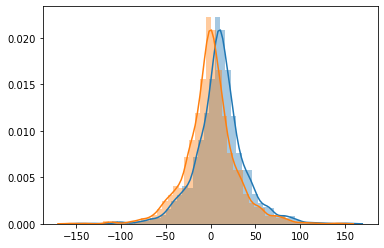

In [217]:
true_answer = [10,10]
protected_answers11,noises11 = add_noise(true_answer, 1, 33)

# データの分布の描画
sns.distplot(protected_answers11)
sns.distplot(noises11)

# epsilon=0.1,1,10のときの結果を比較する

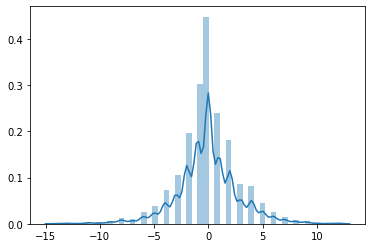

In [221]:
# sns.distplot(noises1)
# sns.distplot(noises11)
sns.distplot(noises110)

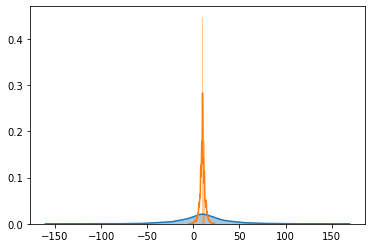

In [222]:
sns.distplot(protected_answers11)
sns.distplot(protected_answers110)

# 統計結果[6,5]に対して
## epsilon=0.1とする、1000回実行した結果

In [152]:
true_answer = [6,5] 
protected_answers3,noises3 = add_noise(true_answer, 0.1, 13)

ノイズ1の平均： 6.5
ノイズ2の平均： 372.5
ノイズ1を加えた結果の平均： 12.0
ノイズ2を加えた結果の平均： 378.0
ラプラスメカニズムの尺度： 200.0
ラプラスメカニズムの敏感度： 20


# 千回実行した結果をデータフレームで見る

In [153]:
result = list(zip(protected_answers3, noises3))
df = pd.DataFrame(result, columns=['protected_answers3', 'noises3'])
df

,protected_answers3,noises3
0,"[168.0, -144.0]","[162.0, -149.0]"
1,"[215.0, 541.0]","[209.0, 536.0]"
2,"[587.0, -15.0]","[581.0, -20.0]"
3,"[55.0, 165.0]","[49.0, 160.0]"
4,"[73.0, 122.0]","[67.0, 117.0]"
...,...,...
995,"[-277.0, -19.0]","[-283.0, -24.0]"
996,"[-104.0, -68.0]","[-110.0, -73.0]"
997,"[-499.0, -251.0]","[-505.0, -256.0]"
998,"[-87.0, -55.0]","[-93.0, -60.0]"


# データの分布の描画

1番目から5番目のノイズ [array([ 3., -3.]), array([ 4., 11.]), array([12., -0.]), array([1., 3.]), array([1., 2.])]


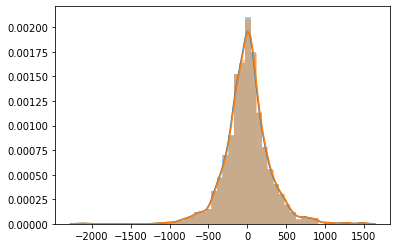

In [164]:
# データの分布の描画
sns.distplot(noises3)
sns.distplot(protected_answers3)

print('1番目から5番目のノイズ',noises4[0:5])

In [59]:
# 毎回ノイズの結果を見る

Text(0, 0.5, 'noise')

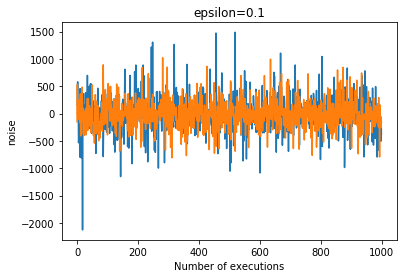

In [155]:
plt.plot(noises3)
plt.title('epsilon=0.1')
plt.xlabel('Number of executions')
plt.ylabel('noise')

# epsilon=5とする、1000回実行した結果

ノイズ1の平均： 0.0
ノイズ2の平均： 7.5
ノイズ1を加えた結果の平均： 5.5
ノイズ2を加えた結果の平均： 13.0
ラプラスメカニズムの尺度： 4.0
ラプラスメカニズムの敏感度： 20


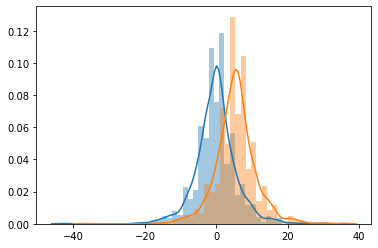

In [156]:
true_answer = [6,5] 
protected_answers4,noises4 = add_noise(true_answer, 5, 13)

sns.distplot(noises4)
sns.distplot(protected_answers4)

In [157]:
result = list(zip(protected_answers4, noises4))
df = pd.DataFrame(result, columns=['protected_answers4', 'noises4'])
df

,protected_answers4,noises4
0,"[9.0, 2.0]","[3.0, -3.0]"
1,"[10.0, 16.0]","[4.0, 11.0]"
2,"[18.0, 5.0]","[12.0, -0.0]"
3,"[7.0, 8.0]","[1.0, 3.0]"
4,"[7.0, 7.0]","[1.0, 2.0]"
...,...,...
995,"[0.0, 5.0]","[-6.0, -0.0]"
996,"[4.0, 4.0]","[-2.0, -1.0]"
997,"[-4.0, 0.0]","[-10.0, -5.0]"
998,"[4.0, 4.0]","[-2.0, -1.0]"


Text(0, 0.5, 'noise')

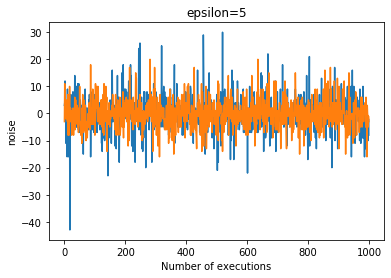

In [158]:
plt.plot(noises4)
plt.title('epsilon=5')
plt.xlabel('Number of executions')
plt.ylabel('noise')

# 統計結果[7,5]に対して
## epsilon=1とする、1000回実行した結果

ノイズ1の平均： 23.0
ノイズ2の平均： 2.0
ノイズ1を加えた結果の平均： 29.0
ノイズ2を加えた結果の平均： 8.0
ラプラスメカニズムの尺度： 20.0
ラプラスメカニズムの敏感度： 20


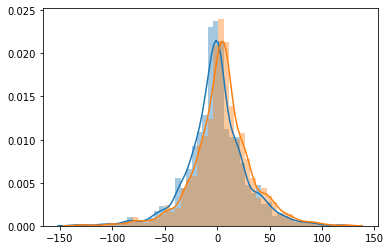

In [159]:
true_answer = [7,5] 
protected_answers5,noises5 = add_noise(true_answer, 1, 23)

sns.distplot(noises5)
sns.distplot(protected_answers5)

In [160]:
result = list(zip(protected_answers5, noises5))
df = pd.DataFrame(result, columns=['protected_answers5', 'noises5'])
df

,protected_answers5,noises5
0,"[8.0, 50.0]","[1.0, 45.0]"
1,"[22.0, -6.0]","[15.0, -11.0]"
2,"[-9.0, 14.0]","[-16.0, 9.0]"
3,"[-15.0, 0.0]","[-22.0, -5.0]"
4,"[12.0, 1.0]","[5.0, -4.0]"
...,...,...
995,"[10.0, 25.0]","[3.0, 20.0]"
996,"[52.0, -19.0]","[45.0, -24.0]"
997,"[27.0, 15.0]","[20.0, 10.0]"
998,"[13.0, -15.0]","[6.0, -20.0]"


Text(0, 0.5, 'noise')

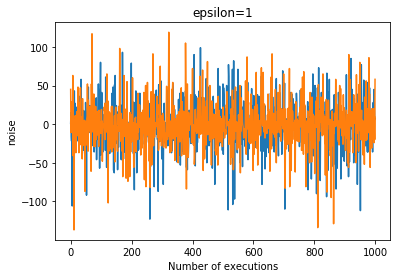

In [161]:
plt.plot(noises5)
plt.title('epsilon=1')
plt.xlabel('Number of executions')
plt.ylabel('noise')

## epsilon=2とする、1000回実行した結果

ノイズ1の平均： 11.0
ノイズ2の平均： 1.0
ノイズ1を加えた結果の平均： 17.0
ノイズ2を加えた結果の平均： 7.0
ラプラスメカニズムの尺度： 10.0
ラプラスメカニズムの敏感度： 20


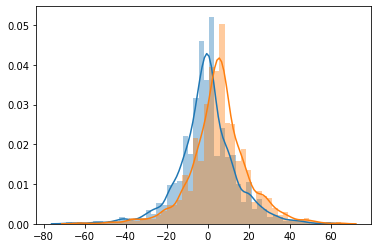

In [165]:
true_answer = [7,5] 
protected_answers6,noises6 = add_noise(true_answer, 2, 23)

sns.distplot(noises6)
sns.distplot(protected_answers6)

In [166]:
result = list(zip(protected_answers6, noises6))
df = pd.DataFrame(result, columns=['protected_answers6', 'noises6'])
df

,protected_answers6,noises6
0,"[7.0, 27.0]","[0.0, 22.0]"
1,"[15.0, -1.0]","[8.0, -6.0]"
2,"[-1.0, 10.0]","[-8.0, 5.0]"
3,"[-4.0, 3.0]","[-11.0, -2.0]"
4,"[10.0, 3.0]","[3.0, -2.0]"
...,...,...
995,"[8.0, 15.0]","[1.0, 10.0]"
996,"[29.0, -7.0]","[22.0, -12.0]"
997,"[17.0, 10.0]","[10.0, 5.0]"
998,"[10.0, -5.0]","[3.0, -10.0]"


Text(0, 0.5, 'noise')

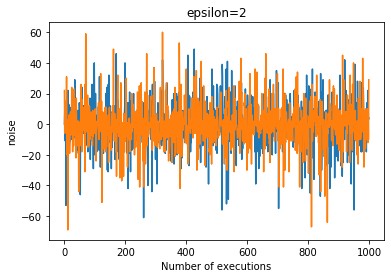

In [167]:
plt.plot(noises6)
plt.title('epsilon=2')
plt.xlabel('Number of executions')
plt.ylabel('noise')

# 毎回のseedは異なると設定した

In [176]:
#　毎回のseedは異なると設定した
n = 20

def add_noise1(true_answer,epsilon):
    epsilon = epsilon
    sensitivity = n
    scale = sensitivity / epsilon
    
    noises = []
    protected_answers = []
    for i in range(1000):
        prng = np.random.RandomState(i)
        noise = prng.laplace(loc=0, scale=scale, size=2)
        
        noise = np.round(noise)    #四捨五入
        protected_answer = true_answer + noise
        protected_answers.append(protected_answer)
        noises.append(noise)

    print("ノイズ1の平均：",noises[0].mean())
    print("ノイズ2の平均：",noises[1].mean())
    print("ノイズ1を加えた結果の平均：",protected_answers[0].mean())
    print("ノイズ2を加えた結果の平均：",protected_answers[1].mean())
    print("ラプラスメカニズムの尺度：",scale)
    print("ラプラスメカニズムの敏感度：",sensitivity)

    return protected_answers,noises

# 統計結果[10,10]に対して
## epsilon=0.1とする、1000回実行した結果

ノイズ1の平均： -6.0
ノイズ2の平均： -68.0
ノイズ1を加えた結果の平均： 4.0
ノイズ2を加えた結果の平均： -58.0
ラプラスメカニズムの尺度： 200.0
ラプラスメカニズムの敏感度： 20


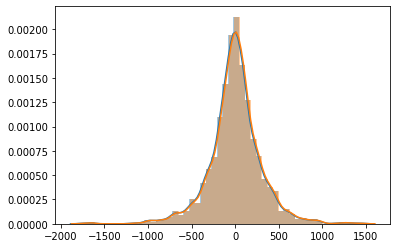

In [180]:
# epsilon=0.1とする、1000回実行した結果
true_answer = [10,10] 
protected_answers1,noises1 = add_noise(true_answer, 0.1, 123)

# データの分布の描画
sns.distplot(noises1)
sns.distplot(protected_answers1)

In [184]:
result = list(zip(protected_answers1, noises1))
df = pd.DataFrame(result, columns=['protected_answers(0.1)', 'noises(0.1)'])
df

,protected_answers(0.1),noises(0.1)
0,"[110.0, -102.0]","[100.0, -112.0]"
1,"[-148.0, 32.0]","[-158.0, 22.0]"
2,"[126.0, -23.0]","[116.0, -33.0]"
3,"[662.0, 102.0]","[652.0, 92.0]"
4,"[2.0, -39.0]","[-8.0, -49.0]"
...,...,...
995,"[123.0, 186.0]","[113.0, 176.0]"
996,"[221.0, 165.0]","[211.0, 155.0]"
997,"[106.0, -180.0]","[96.0, -190.0]"
998,"[134.0, -110.0]","[124.0, -120.0]"


Text(0, 0.5, 'noise')

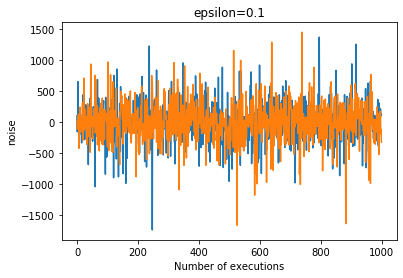

In [191]:
plt.plot(noises1)
plt.title('epsilon=0.1')
plt.xlabel('Number of executions')
plt.ylabel('noise')

# epsilon=1とする、1000回実行した結果

ノイズ1の平均： -0.5
ノイズ2の平均： -7.0
ノイズ1を加えた結果の平均： 9.5
ノイズ2を加えた結果の平均： 3.0
ラプラスメカニズムの尺度： 20.0
ラプラスメカニズムの敏感度： 20


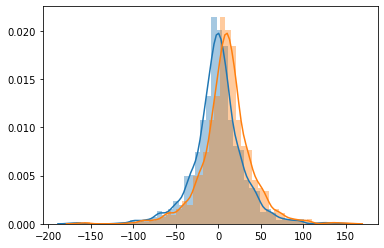

In [194]:
true_answer = [10,10] 
protected_answers12,noises12 = add_noise(true_answer, 1, 123)

# データの分布の描画
sns.distplot(noises12)
sns.distplot(protected_answers12)

In [195]:
result = list(zip(protected_answers12, noises12))
df = pd.DataFrame(result, columns=['protected_answers(1)', 'noises(1)'])
df

,protected_answers(1),noises(1)
0,"[20.0, -1.0]","[10.0, -11.0]"
1,"[-6.0, 12.0]","[-16.0, 2.0]"
2,"[22.0, 7.0]","[12.0, -3.0]"
3,"[75.0, 19.0]","[65.0, 9.0]"
4,"[9.0, 5.0]","[-1.0, -5.0]"
...,...,...
995,"[21.0, 28.0]","[11.0, 18.0]"
996,"[31.0, 26.0]","[21.0, 16.0]"
997,"[20.0, -9.0]","[10.0, -19.0]"
998,"[22.0, -2.0]","[12.0, -12.0]"


Text(0, 0.5, 'noise')

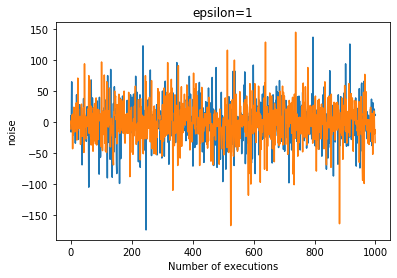

In [196]:
plt.plot(noises12)
plt.title('epsilon=1')
plt.xlabel('Number of executions')
plt.ylabel('noise')

ノイズ1の平均： 3.5
ノイズ2の平均： 2.0
ノイズ1を加えた結果の平均： 9.5
ノイズ2を加えた結果の平均： 8.0
ラプラスメカニズムの尺度： 10.0
ラプラスメカニズムの敏感度： 20


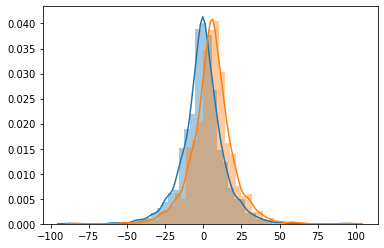

In [173]:
true_answer = [7,5] 
protected_answers7,noises7 = add_noise1(true_answer, 2)

sns.distplot(noises7)
sns.distplot(protected_answers7)

Text(0, 0.5, 'noise')

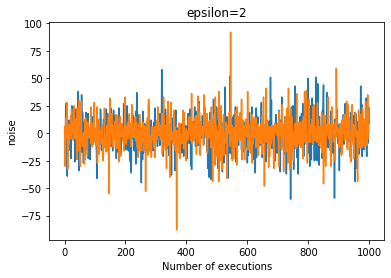

In [174]:
plt.plot(noises7)
plt.title('epsilon=2')
plt.xlabel('Number of executions')
plt.ylabel('noise')

In [175]:
result = list(zip(protected_answers7, noises7))
df = pd.DataFrame(result, columns=['protected_answers7', 'noises7'])
df

,protected_answers7,noises7
0,"[8.0, 11.0]","[1.0, 6.0]"
1,"[5.0, 11.0]","[-2.0, 6.0]"
2,"[6.0, -25.0]","[-1.0, -30.0]"
3,"[8.0, 10.0]","[1.0, 5.0]"
4,"[34.0, 6.0]","[27.0, 1.0]"
...,...,...
995,"[4.0, 40.0]","[-3.0, 35.0]"
996,"[-2.0, 0.0]","[-9.0, -5.0]"
997,"[6.0, 22.0]","[-1.0, 17.0]"
998,"[31.0, 9.0]","[24.0, 4.0]"
